## Blinkit Data Analysis

### Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("blinkit_data.csv")

In [65]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [66]:
df.shape

(8523, 12)

In [67]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [68]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [69]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [70]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg': 'Regular'
})

In [71]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [83]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### Business Requirement

#### KPIs Requirement

In [87]:
# Total Sales

In [89]:
total_sales = df['Sales'].sum()

In [91]:
total_sales

1201681.4808

In [93]:
# Average Sales

In [95]:
avg_sales = df['Sales'].mean()

In [97]:
avg_sales

140.9927819781767

In [99]:
# Number of items sold

In [101]:
no_items_sold = df['Sales'].count()

In [103]:
no_items_sold

8523

In [105]:
# Average Ratings

In [107]:
avg_ratings = df['Rating'].mean()

In [109]:
avg_ratings

3.965857092573038

In [120]:
#Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"Number of items Sold: {no_items_sold:,.0f}")
print(f"Average Rating: {avg_ratings:,.1f}")

Total Sales: $1,201,681
Average Sales: $141
Number of items Sold: 8,523
Average Rating: 4.0


#### Charts Requirement

In [123]:
# 1. Total Sales by Fat content

In [143]:
total_sales_fat = df.groupby('Item Fat Content')['Sales'].sum()
total_sales_fat

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

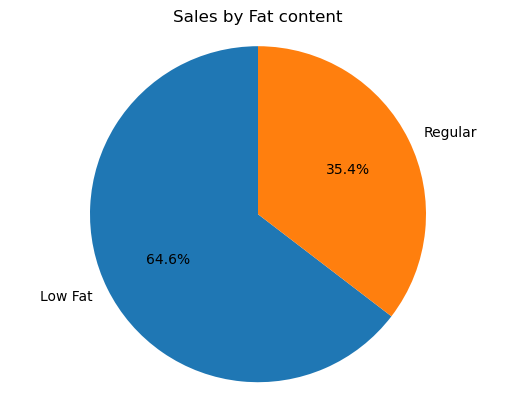

In [145]:
plt.pie(total_sales_fat, labels = total_sales_fat.index, autopct = "%.1f%%", startangle = 90)
plt.title('Sales by Fat content')
plt.axis('equal')
plt.show()

In [147]:
# 2. Total Sales by item type

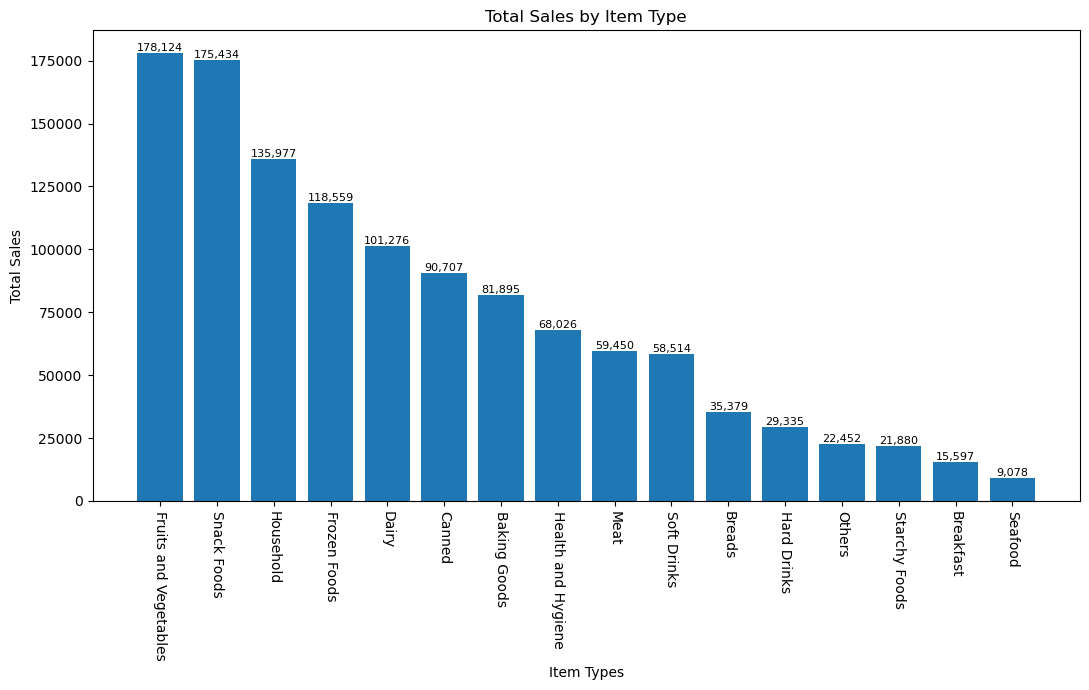

In [157]:
item_total_sales = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (11,7))
bars = plt.bar(item_total_sales.index, item_total_sales.values)
plt.xticks(rotation = -90)
plt.xlabel('Item Types')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for i in bars:
    plt.text(i.get_x() + i.get_width() /2, i.get_height(), f'{i.get_height():,.0f}', ha = 'center', va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()

In [159]:
# 3. Total Sales by Fat Content and Outlet

In [190]:
fat_outlet_sales = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
fat_outlet_sales


Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 1,215047.9126,121349.8994
Tier 2,254464.7734,138685.8682
Tier 3,306806.9924,165326.0348


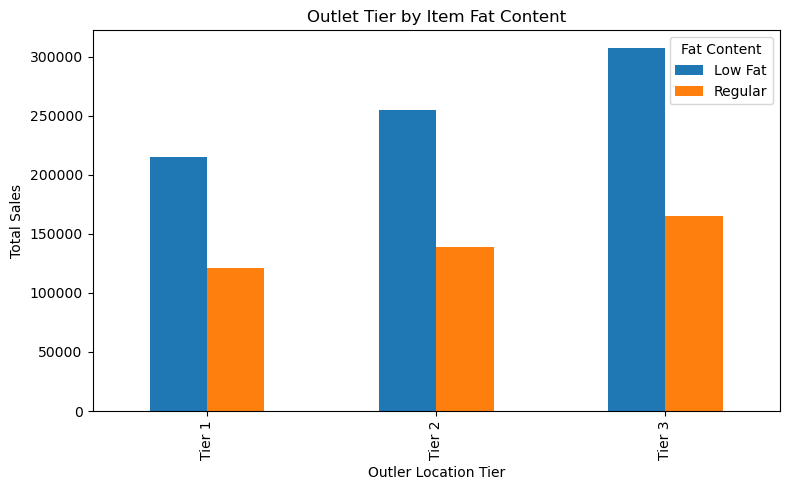

In [192]:
fat_outlet_sales.plot(kind = 'bar', figsize = (8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outler Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Fat Content')

plt.tight_layout()
plt.show()

In [194]:
# 4. Total Sales by Outlet Establishment

In [216]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
sales_by_year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

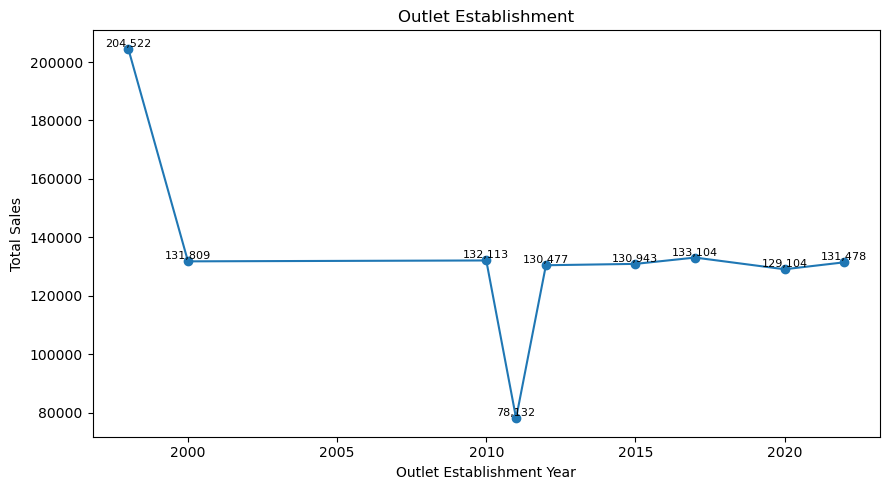

In [220]:
plt.figure(figsize = (9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha = 'center', va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()

In [222]:
#5. Sales by Outlet size

In [224]:
sales_outlet_size = df.groupby('Outlet Size')['Sales'].sum()
sales_outlet_size

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64

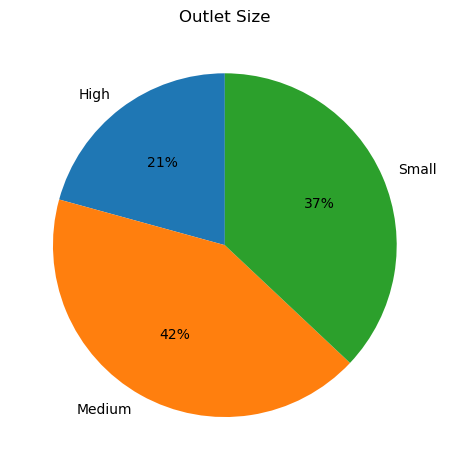

In [230]:
plt.pie(sales_outlet_size, labels = sales_outlet_size.index, autopct = '%1.0f%%', startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

In [232]:
# 6. Sales by Outlet Location

In [242]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location

,Outlet Location Type,Sales
0,Tier 1,336397.8120
1,Tier 2,393150.6416
2,Tier 3,472133.0272


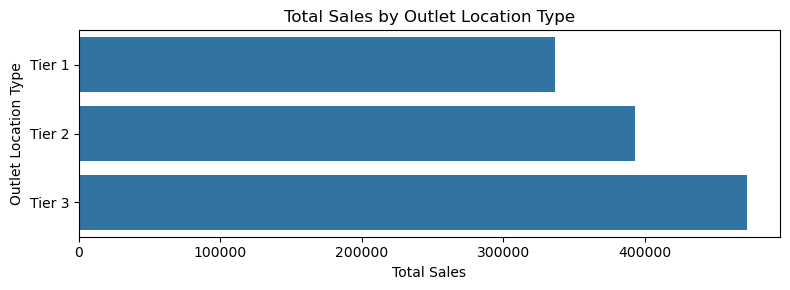

In [244]:
plt.figure(figsize = (8, 3))
sns.barplot(x = 'Sales', y = 'Outlet Location Type', data = sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()